In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import ast

In [4]:
def str2list(a):
    if a == "Error: Unable to retrieve README for url. Status code: 404":
        return []
    else:
        return ast.literal_eval(a)

In [5]:
input_file = "../data/metadata/metadata.csv"
metadata = pd.read_csv(input_file, low_memory=False)
metadata.set_index('Unnamed: 0', inplace=True)
forks = metadata["forks_count"]

In [6]:
#input_file = "../data/info_repos/release/release.csv"
#release = pd.read_csv(input_file, low_memory=False)
#release.rename({"Unnamed: 0": "id", "url": "release"}, axis=1, inplace=True)
#release["release"] = release["release"].apply(str2list)
#release["release_number"] = release["release"].apply(lambda x: len(x))
#with open('../data/release_count.npy', 'wb') as f:
#    np.save(f, release["release_number"])

In [7]:
release = np.load("../data/release_count.npy")

In [8]:
hist_name, hist_count = np.unique(release, return_counts=True)
hist_name = [str(i) for i in hist_name]
numerous_releases = np.sum(hist_count[10:])
hist_name = hist_name[:10]
hist_count = hist_count[:10]
hist_name[-1] = "10+"
hist_count[-1] = numerous_releases

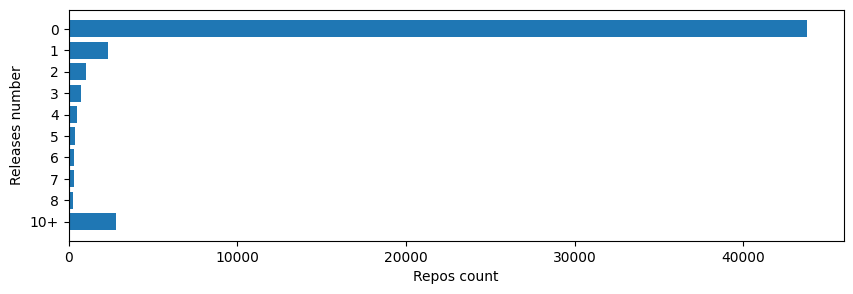

In [19]:
fig, axs = plt.subplots(figsize=(10, 3))
axs.barh(y=hist_name, width=hist_count)
axs.yaxis.set_inverted(True)
axs.set_ylabel("Releases number")
axs.set_xlabel("Repos count")
plt.savefig("../figures/release_count_bar.png")

In [15]:
forks = np.where(forks>30, 30, forks)

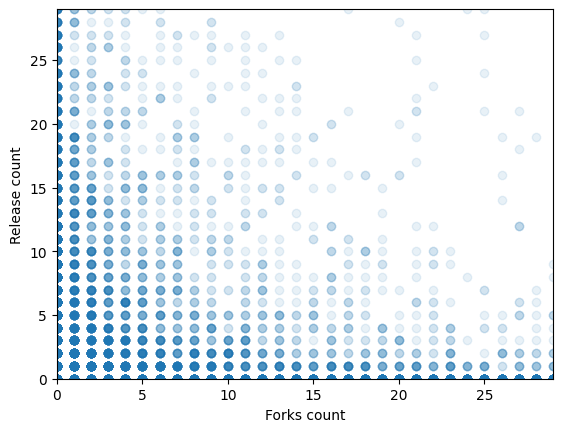

In [18]:
fig, ax = plt.subplots()
ax.scatter(forks, release, alpha=0.1)
ax.set_xlabel("Forks count")
ax.set_ylabel("Release count")
ax.set_xlim(0, 29)
ax.set_ylim(0, 29)
plt.savefig("../figures/release_forks_scatter.png")